### Column Descriptions

- **Unnamed: 0**:  
  An index column that appears to be a row identifier, possibly created automatically.

- **name**:  
  The name of the company or startup.

- **market**:  
  The industry or sector the company operates in, such as _"News," "Publishing,"_ or _"E-Commerce."_

- **funding_total_usd**:  
  The total funding the company has received in USD.

- **status**:  
  The current operational status of the company, such as _"acquired"_ or _"operating."_

- **region**:  
  The broader region where the company is located, e.g., _"New York City," "Dallas."_

- **city**:  
  The specific city where the company is based.

- **funding_rounds**:  
  The number of funding rounds the company has gone through.

- **founded_at**:  
  The exact date the company was founded.

- **founded_month**:  
  The month the company was founded.

- **round_A**:  
  Amount raised in round A of funding (if applicable).

- **round_B**:  
  Amount raised in round B of funding (if applicable).

- **round_C**:  
  Amount raised in round C of funding (if applicable).

- **round_D**:  
  Amount raised in round D of funding (if applicable).

- **round_E**:  
  Amount raised in round E of funding (if applicable).

- **round_F**:  
  Amount raised in round F of funding (if applicable).

- **round_G**:  
  Amount raised in round G of funding (if applicable).

- **round_H**:  
  Amount raised in round H of funding (if applicable).

- **country**:  
  The country where the company is based.

- **quarter**:  
  The quarter (Q1, Q2, etc.) when the company was founded or reported funding.

In [166]:
# input market, region, city, seed
# status, funding, round
import pandas as pd
import seaborn as sns
df = pd.read_csv('/Users/SHAD/code/Parvxi/Peaklytics/raw_data/Peaklytics_intial_data.csv')
df.head()
df.columns

Index(['Unnamed: 0', 'name', 'market', 'funding_total_usd', 'status', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H',
       'country', 'quater'],
      dtype='object')

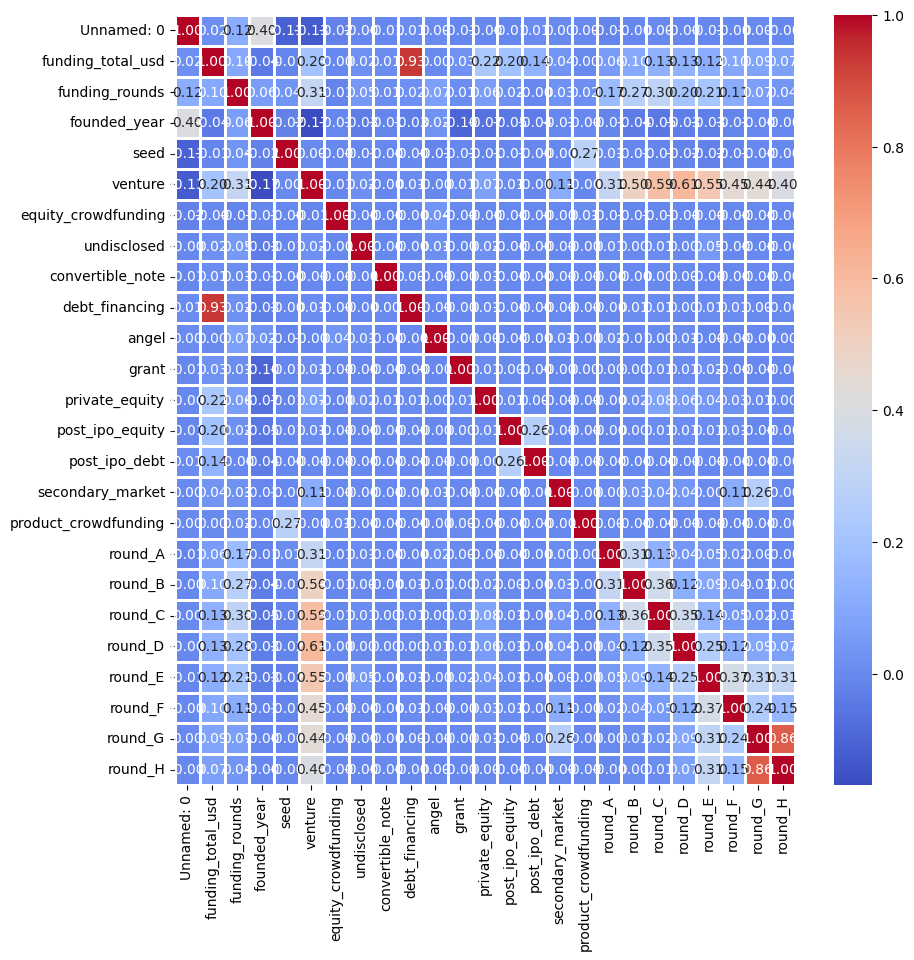

In [167]:
from matplotlib import pyplot as plt
numerical_columns = df.select_dtypes(include=['number']).columns
df[numerical_columns].corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm', linewidths=0.8, fmt='.2f', ax=ax)
plt.show()
# remove
# ronud G, H
# debt_financing and funding_total_USD
# venture, seed

In [168]:
df['funding_category'] = df.apply(
    lambda x: 'Single Round - Traditional' if x['funding_rounds'] == 1 and x[['seed', 'venture']].sum() == 0
    else 'Single Round - Non-traditional' if x['funding_rounds'] == 1 and x[['seed', 'venture']].sum() > 0
    else 'Multiple Rounds', axis=1
)
df.head()

,Unnamed: 0,name,market,funding_total_usd,status,region,city,funding_rounds,founded_at,founded_month,...,round_B,round_C,round_D,round_E,round_F,round_G,round_H,country,quater,funding_category
0,0,#waywire,News,1750000.0,acquired,New York City,New York,1.0,2012-06-01,2012-06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,United States,Q2,Single Round - Non-traditional
1,2,'Rock' Your Paper,Publishing,40000.0,operating,Tallinn,Tallinn,1.0,2012-10-26,2012-10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Estonia,Q4,Single Round - Non-traditional
2,3,(In)Touch Network,Electronics,1500000.0,operating,London,London,1.0,2011-04-01,2011-04,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,United Kingdom,Q2,Single Round - Non-traditional
3,4,-R- Ranch and Mine,Tourism,60000.0,operating,Dallas,Fort Worth,2.0,2014-01-01,2014-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,United States,Q1,Multiple Rounds
4,10,"1,2,3 Listo",E-Commerce,40000.0,operating,Santiago,Las Condes,1.0,2012-01-01,2012-01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Chile,Q1,Single Round - Non-traditional


In [169]:


df.drop(columns=['Unnamed: 0','round_G', 'round_H', 'debt_financing', 'founded_quarter', 'quater', 'founded_month', 'name', 'seed', 'venture', 'equity_crowdfunding','undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant','private_equity', 'post_ipo_equity', 'post_ipo_debt','secondary_market', 'round_A', 'round_B','product_crowdfunding', 'round_C', 'round_D', 'round_E', 'round_F'], inplace=True)

In [170]:
df['funding_total_usd']

0        1.750000e+06
1        4.000000e+04
2        1.500000e+06
3        6.000000e+04
4        4.000000e+04
             ...     
43263    3.764643e+07
43264    8.847936e+06
43265    2.683782e+07
43266    1.816620e+05
43267    3.616932e+07
Name: funding_total_usd, Length: 43268, dtype: float64

In [171]:
df.isnull().sum()

market               0
funding_total_usd    0
status               0
region               0
city                 0
funding_rounds       0
founded_at           0
founded_year         0
first_funding_at     0
last_funding_at      0
country              0
funding_category     0
dtype: int64

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43268 entries, 0 to 43267
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   market             43268 non-null  object 
 1   funding_total_usd  43268 non-null  float64
 2   status             43268 non-null  object 
 3   region             43268 non-null  object 
 4   city               43268 non-null  object 
 5   funding_rounds     43268 non-null  float64
 6   founded_at         43268 non-null  object 
 7   founded_year       43268 non-null  float64
 8   first_funding_at   43268 non-null  object 
 9   last_funding_at    43268 non-null  object 
 10  country            43268 non-null  object 
 11  funding_category   43268 non-null  object 
dtypes: float64(3), object(9)
memory usage: 4.0+ MB


In [173]:
df['status'].value_counts(normalize=True)

status
operating    0.555561
acquired     0.222220
closed       0.222220
Name: proportion, dtype: float64

In [174]:
df.describe()

,funding_total_usd,funding_rounds,founded_year
count,4.326800e+04,43268.000000,43268.000000
mean,2.024147e+07,2.181543,2010.210756
std,1.574605e+08,1.402587,7.631976
min,3.000000e+01,1.000000,1902.000000
25%,1.025000e+06,1.000000,2007.000000
50%,7.600000e+06,2.000000,2011.000000
75%,2.650081e+07,3.000000,2014.000000
max,3.007950e+10,18.000000,2022.000000


In [175]:
numerical_columns

Index(['Unnamed: 0', 'funding_total_usd', 'funding_rounds', 'founded_year',
       'seed', 'venture', 'equity_crowdfunding', 'undisclosed',
       'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

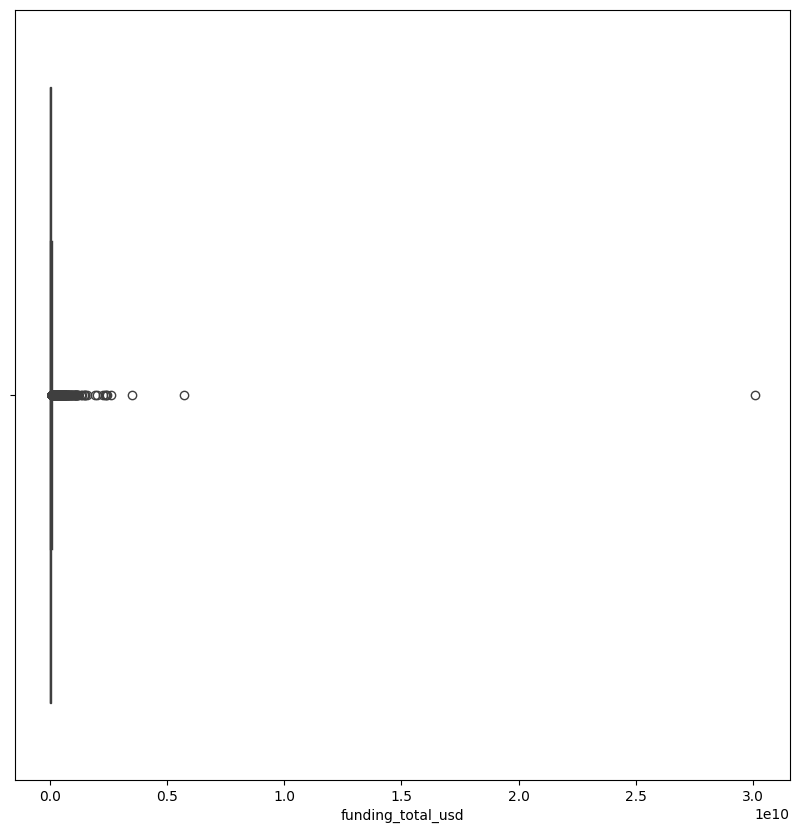

In [176]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(x='funding_total_usd', data=df, ax=ax)
plt.show()


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43268 entries, 0 to 43267
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   market             43268 non-null  object 
 1   funding_total_usd  43268 non-null  float64
 2   status             43268 non-null  object 
 3   region             43268 non-null  object 
 4   city               43268 non-null  object 
 5   funding_rounds     43268 non-null  float64
 6   founded_at         43268 non-null  object 
 7   founded_year       43268 non-null  float64
 8   first_funding_at   43268 non-null  object 
 9   last_funding_at    43268 non-null  object 
 10  country            43268 non-null  object 
 11  funding_category   43268 non-null  object 
dtypes: float64(3), object(9)
memory usage: 4.0+ MB


In [178]:
from datetime import datetime
df['founded_at'] = pd.to_datetime(df['founded_at'])

In [179]:
current_year = datetime.now().year
df['company_age'] = current_year - df['founded_at'].dt.year
df['company_age']

0        12
1        12
2        13
3        10
4        12
         ..
43263     4
43264     3
43265     9
43266    11
43267    11
Name: company_age, Length: 43268, dtype: int32

In [180]:
df.drop(columns=['founded_at', 'founded_year'], inplace=True)

In [181]:
df.head()

,market,funding_total_usd,status,region,city,funding_rounds,first_funding_at,last_funding_at,country,funding_category,company_age
0,News,1750000.0,acquired,New York City,New York,1.0,2012-06-30,2012-06-30,United States,Single Round - Non-traditional,12
1,Publishing,40000.0,operating,Tallinn,Tallinn,1.0,2012-08-09,2012-08-09,Estonia,Single Round - Non-traditional,12
2,Electronics,1500000.0,operating,London,London,1.0,2011-04-01,2011-04-01,United Kingdom,Single Round - Non-traditional,13
3,Tourism,60000.0,operating,Dallas,Fort Worth,2.0,2014-08-17,2014-09-26,United States,Multiple Rounds,10
4,E-Commerce,40000.0,operating,Santiago,Las Condes,1.0,2013-02-18,2013-02-18,Chile,Single Round - Non-traditional,12


In [182]:
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'], errors='coerce')
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'], errors='coerce')

In [183]:
df_2 = df.copy()

In [184]:
df_2.head()

,market,funding_total_usd,status,region,city,funding_rounds,first_funding_at,last_funding_at,country,funding_category,company_age
0,News,1750000.0,acquired,New York City,New York,1.0,2012-06-30,2012-06-30,United States,Single Round - Non-traditional,12
1,Publishing,40000.0,operating,Tallinn,Tallinn,1.0,2012-08-09,2012-08-09,Estonia,Single Round - Non-traditional,12
2,Electronics,1500000.0,operating,London,London,1.0,2011-04-01,2011-04-01,United Kingdom,Single Round - Non-traditional,13
3,Tourism,60000.0,operating,Dallas,Fort Worth,2.0,2014-08-17,2014-09-26,United States,Multiple Rounds,10
4,E-Commerce,40000.0,operating,Santiago,Las Condes,1.0,2013-02-18,2013-02-18,Chile,Single Round - Non-traditional,12


In [185]:
df_2.columns

Index(['market', 'funding_total_usd', 'status', 'region', 'city',
       'funding_rounds', 'first_funding_at', 'last_funding_at', 'country',
       'funding_category', 'company_age'],
      dtype='object')

In [186]:
df_2['status'].value_counts()

status
operating    24038
acquired      9615
closed        9615
Name: count, dtype: int64

df['funding_rounds]

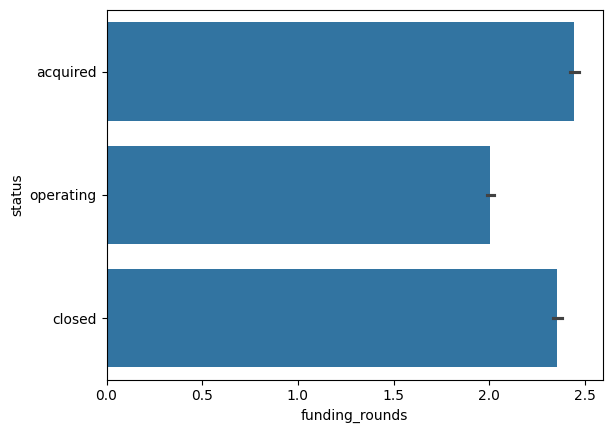

In [187]:
df_2['status'].map({'operating': 1, 'acquired': 2, 'closed': 3})
sns.barplot(x='funding_rounds', y='status', data=df_2);

equity_crowdfunding
round_A
round_B
round_C
round_D
round_E
round_F
round_G
round_H


In [188]:
df_2.head()

,market,funding_total_usd,status,region,city,funding_rounds,first_funding_at,last_funding_at,country,funding_category,company_age
0,News,1750000.0,acquired,New York City,New York,1.0,2012-06-30,2012-06-30,United States,Single Round - Non-traditional,12
1,Publishing,40000.0,operating,Tallinn,Tallinn,1.0,2012-08-09,2012-08-09,Estonia,Single Round - Non-traditional,12
2,Electronics,1500000.0,operating,London,London,1.0,2011-04-01,2011-04-01,United Kingdom,Single Round - Non-traditional,13
3,Tourism,60000.0,operating,Dallas,Fort Worth,2.0,2014-08-17,2014-09-26,United States,Multiple Rounds,10
4,E-Commerce,40000.0,operating,Santiago,Las Condes,1.0,2013-02-18,2013-02-18,Chile,Single Round - Non-traditional,12


In [189]:
df_2.columns

Index(['market', 'funding_total_usd', 'status', 'region', 'city',
       'funding_rounds', 'first_funding_at', 'last_funding_at', 'country',
       'funding_category', 'company_age'],
      dtype='object')

In [190]:
#df_2.to_csv('cleaned_peaklytics_data.csv', index=False)